In [3]:
import numpy as np 
import pandas as pd 
from scipy.stats import randint 
import pandas as pd 
import matplotlib.pyplot as plt  
from pandas import set_option  
plt.style.use('ggplot') 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.feature_selection import RFE 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier  
import xgboost as xgb 
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB      
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.feature_selection import SelectFromModel  
from sklearn import metrics 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning) 
from sklearn.metrics import classification_report 
covid_19_data = pd.read_csv(r"C:/Users/sarah/Downloads/covid_19_data.csv")
print(f'The shape of the dataframe is {covid_19_data.shape}')  
print()

The shape of the dataframe is (4247, 8)



In [4]:
print(covid_19_data.info()) 
print() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              4247 non-null   int64  
 1   ObservationDate  4247 non-null   object 
 2   Province/State   2746 non-null   object 
 3   Country/Region   4247 non-null   object 
 4   Last Update      4247 non-null   object 
 5   Confirmed        4247 non-null   float64
 6   Deaths           4247 non-null   float64
 7   Recovered        4247 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 265.6+ KB
None



In [7]:
 
if covid_19_data.isin(["?"]).any().any():  
    covid_19_data.replace(to_replace='?', value=np.NaN, inplace=True)  

print(covid_19_data.info())  # Check data after replacement  
print(covid_19_data.describe(include='all'))  # Display summary statistics  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              4247 non-null   int64  
 1   ObservationDate  4247 non-null   object 
 2   Province/State   2746 non-null   object 
 3   Country/Region   4247 non-null   object 
 4   Last Update      4247 non-null   object 
 5   Confirmed        4247 non-null   float64
 6   Deaths           4247 non-null   float64
 7   Recovered        4247 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 265.6+ KB
None
                SNo ObservationDate Province/State  Country/Region  \
count   4247.000000            4247           2746            4247   
unique          NaN              47            181             111   
top             NaN      03/08/2020          Anhui  Mainland China   
freq            NaN             255             47            1451   
mean    2124.00

In [8]:
print(covid_19_data['Country/Region'].value_counts())  
print(covid_19_data.isnull().sum()) 

Country/Region
Mainland China    1451
US                 783
Australia          201
Canada             133
Macau               47
                  ... 
Bulgaria             1
Maldives             1
Bangladesh           1
Moldova              1
Paraguay             1
Name: count, Length: 111, dtype: int64
SNo                   0
ObservationDate       0
Province/State     1501
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


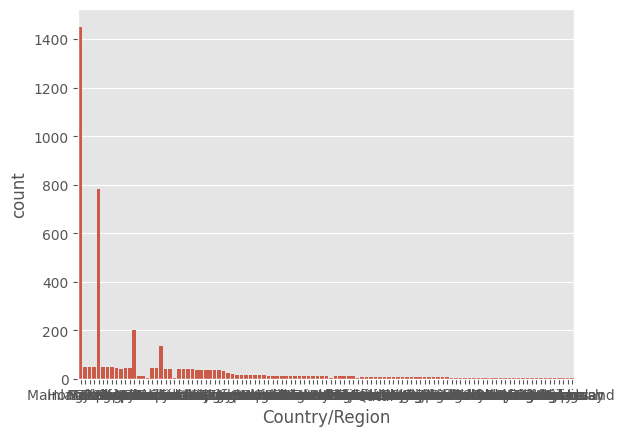

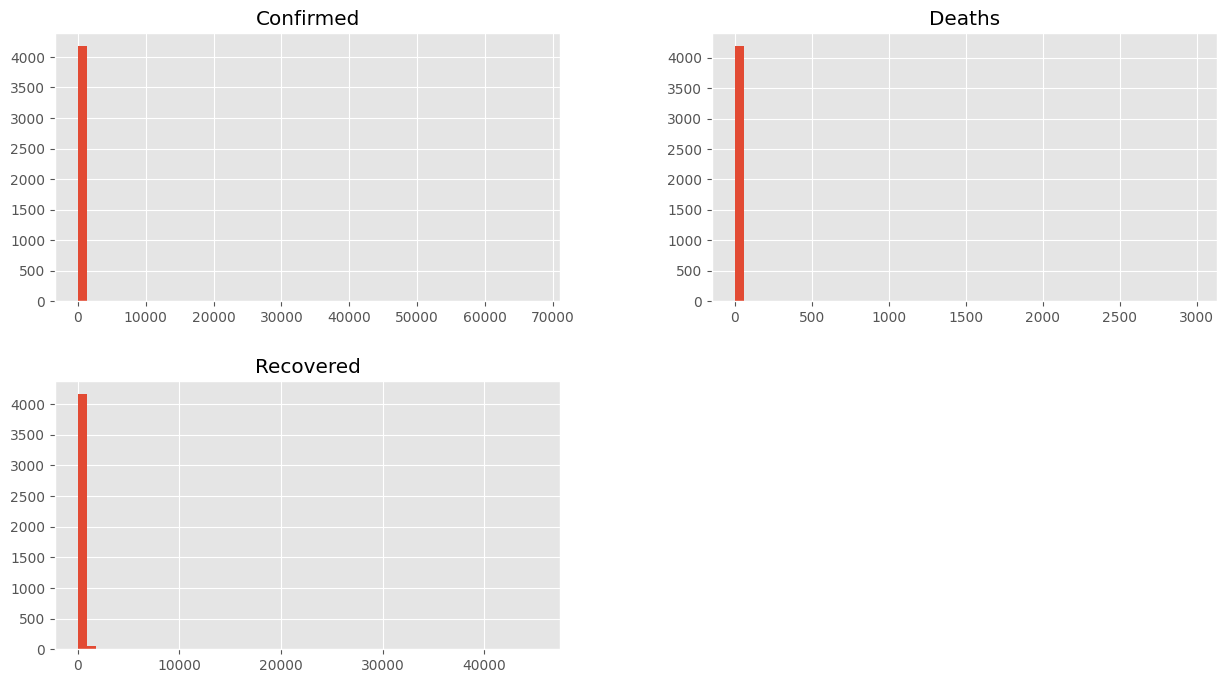

KeyError: "['confirmed'] not in index"

In [14]:
import seaborn as sns 
sns.countplot(x='Country/Region', data=covid_19_data, linewidth=3) 
plt.show() 
covid_19_data[['ObservationDate', 'Province/State', 'Country/Region','Last Update','Confirmed', 
'Deaths', 'Recovered']].hist(bins=50, figsize=(15,8)) 
plt.show() 
covid_19_data['Country/Region'].fillna(covid_19_data['Country/Region'].mode()[0], 
inplace=True) 
covid_19_data['Confirmed'].fillna(covid_19_data['Confirmed'].mode()[0], inplace=True) 
X = covid_19_data.drop(['Deaths'],axis=1) 
y = covid_19_data.Recovered 
X=X[['confirmed', 'Recovered']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
NB_classifier = GaussianNB() 
NB_classifier.fit(X_train, y_train) 
y_predict = NB_classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_predict) 
sns.heatmap(cm, annot=True, cmap='Blues') 
print(classification_report(y_test, y_predict))